In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def BS_formula(option_type, S, K, r, T, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
      price = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    elif option_type == 'put':
      price = - S * stats.norm.cdf(-d1) + K * np.exp(-r * T) * stats.norm.cdf(-d2)
    return price

In [ ]:
def delta(option_type, S, K, r, T, sigma):
  d1 = (np.log(S/K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
  if option_type == 'call':
    return stats.norm.cdf(d1)
  elif option_type == 'put':
    return stats.norm.cdf(d1) - 1

def theta(option_type, S, K, r, T, sigma):
  d1 = (np.log(S/K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  if option_type == 'call':
    theta = (-sigma * S * stats.norm.pdf(d1)) / (2 * np.sqrt(T)) - r * K * np.exp(-r*T) * stats.norm.cdf(d2)
  elif option_type == 'put':
    theta = (-sigma * S * stats.norm.pdf(d1)) / (2 * np.sqrt(T)) + r * K * np.exp(-r*T) * stats.norm.cdf(-d2)
  return theta

def gamma(S,K,r,T,sigma):
  d1 = (np.log(S/K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
  gamma = stats.norm.pdf(d1) / (sigma * S * np.sqrt(T))
  return gamma

def vega(S,K,r,T,sigma):
  d1 = (np.log(S/K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
  vega = S * np.sqrt(T) * stats.norm.pdf(d1)
  return vega

def rho(option_type, S, K, r, T, sigma):
  d1 = (np.log(S/K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  if option_type == 'call':
    rho = K * T * np.exp(-r * T) * stats.norm.cdf(d2)
  elif option_type == 'put':
    rho = - K * T * np.exp(-r * T) * stats.norm.cdf(-d2)
  return rho

CRR model

In [ ]:
def call_payoff(S, K):
    if S > K:
      return (S - K) 
    else:
      return 0

def put_payoff(S, K):
    if K > S:
      return (K - S) 
    else:
      return 0

def CRR_model(option_type, S0, K, r, T, sigma, n):
    
    S = np.zeros((n+1,n+1))
    V = np.zeros((n+1,n+1))
    dt = T / n

    a = np.exp(r * dt)
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (a - d) / (u - d)

    S[0,0] = S0
    for i in range(1, n+1):
        for j in range(n, 0, -1):
            S[j,i] = u * S[j-1,i-1]
        S[0,i] = d * S[0,i-1]

    if option_type == 'call':
        for i in range(n+1):
            V[i] = call_payoff(S[i,n], K)

        for i in range(n,0,-1):
          for j in range(0, n):
            V[j,i-1] = ((p * V[j+1,i]) + ((1 - p) * V[j,i])) * np.exp(- r * dt)

    elif option_type == 'put':
        for i in range(n+1):
            V[i] = put_payoff(S[i,n], K)
        
        for i in range(n,0,-1):
          for j in range(0, n):
            V[j,i-1] = ((p * V[j+1,i]) + ((1 - p) * V[j,i])) * np.exp(- r * dt)

    P = pd.DataFrame(S)
    F = pd.DataFrame(V)

    return V[0,0], P, F

In [ ]:
S = 100
K = 100
r = 0.05
T = 1
sigma = 0.3
n = 252

V,P,F = CRR_model('call',S,K,r,T,sigma,n)
print(V)
print(BS_formula('call',S,K,r,T,sigma))

14.231254785985819
14.219569583633435


In [ ]:
P

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,100.0,98.127923,96.290892,94.488253,92.719360,90.983582,89.280299,87.608903,85.968796,84.359394,...,1.012985,0.994022,0.975413,0.957152,0.939234,0.921650,0.904396,0.887465,0.870851,0.854548
1,0.0,101.907793,100.000000,98.127923,96.290892,94.488253,92.719360,90.983582,89.280299,87.608903,...,1.052005,1.032311,1.012985,0.994022,0.975413,0.957152,0.939234,0.921650,0.904396,0.887465
2,0.0,0.000000,103.851982,101.907793,100.000000,98.127923,96.290892,94.488253,92.719360,90.983582,...,1.092528,1.072076,1.052005,1.032311,1.012985,0.994022,0.975413,0.957152,0.939234,0.921650
3,0.0,0.000000,0.000000,105.833262,103.851982,101.907793,100.000000,98.127923,96.290892,94.488253,...,1.134612,1.113372,1.092528,1.072076,1.052005,1.032311,1.012985,0.994022,0.975413,0.957152
4,0.0,0.000000,0.000000,0.000000,107.852341,105.833262,103.851982,101.907793,100.000000,98.127923,...,1.178318,1.156259,1.134612,1.113372,1.092528,1.072076,1.052005,1.032311,1.012985,0.994022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10850.100822,10646.978561,10447.658904,10252.070666,10060.143990
249,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11057.098235,10850.100822,10646.978561,10447.658904
250,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11268.044730,11057.098235,10850.100822
251,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11483.015645,11268.044730


In [ ]:
F

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,14.219570,13.041582,11.930878,10.886265,9.906389,8.989736,8.134642,7.339292,6.601736,5.919894,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,16.715697,15.400722,14.155124,12.978028,11.868401,10.825045,9.846600,8.931547,8.078210,7.284764,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,19.490100,18.034538,16.649812,15.335361,14.090472,12.914272,11.805727,10.763636,9.786634,8.873193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,22.548858,20.950334,19.423507,17.968104,16.583717,15.269789,14.025610,12.850311,11.742855,10.702037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25.895685,24.152965,22.482262,20.883556,19.356710,17.901461,16.517409,15.204003,13.960538,12.786143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,11583.707471,11583.707471,11583.707471,11583.707471,11583.707471,11583.707471,11583.707471,11583.707471,11583.707471,11583.707471,...,11430.010844,11353.720570,11248.952034,11111.923252,10943.195313,10750.180156,10547.038067,10347.698579,10152.090505,9960.143990
249,11588.299812,11588.299812,11588.299812,11588.299812,11588.299812,11588.299812,11588.299812,11588.299812,11588.299812,11588.299812,...,11541.240492,11510.672393,11462.770359,11390.152821,11284.702335,11140.143743,10957.157741,10750.140497,10546.998400,10347.658904
250,11592.893973,11592.893973,11592.893973,11592.893973,11592.893973,11592.893973,11592.893973,11592.893973,11592.893973,11592.893973,...,11583.786177,11576.319934,11563.037267,11539.779869,11499.897574,11433.431300,11327.162149,11168.084404,10957.118075,10750.100822
251,11597.489955,11597.489955,11597.489955,11597.489955,11597.489955,11597.489955,11597.489955,11597.489955,11597.489955,11597.489955,...,11596.660575,11595.829121,11594.164133,11590.829994,11584.153378,11570.783449,11544.010158,11490.396624,11383.035485,11168.044730


In [ ]:
F[1][0]

13.041581605170842

CRR Greeks

In [ ]:
def CRR_delta(option_type, S, K, r, T, sigma, n):

  V,P,F = CRR_model(option_type, S, K, r, T, sigma, n)
  
  fu = F[1][1]
  fd = F[1][0]
  Su = P[1][1]
  Sd = P[1][0]

  delta = (fu - fd) / (Su - Sd)
  return delta

In [ ]:
print(CRR_delta('call',S,K,r,T,sigma,5))
print(delta('call',S,K,r,T,sigma))

0.6170582997602175
0.6242517279060125


In [ ]:
def CRR_gamma(S, K, r, T, sigma, n):
  
  V,P,F = CRR_model('call', S, K, r, T, sigma, n)

  delta_u = (F[2][2] - F[2][1]) / (P[2][2] - P[0][0])
  delta_d = (F[2][1] - F[2][0]) / (P[0][0] - P[2][0])
  h = 0.5 * (P[2][2] - P[2][0])

  gamma = (delta_u - delta_d) / h
  return gamma

In [ ]:
print(CRR_gamma(S,K,r,T,sigma,n))
print(gamma(S,K,r,T,sigma))

0.01268758838640926
0.012647764437231512


In [ ]:
def CRR_theta(option_type, S, K, r, T, sigma, n):
  
  V,P,F = CRR_model(option_type, S, K, r, T, sigma, n)
  dt = T / n

  theta = (F[2][1] - F[0][0]) / (2 * dt)
  return theta

In [ ]:
print(CRR_theta('call',S,K,r,T,sigma,n))
print(theta('call',S,K,r,T,sigma))

-8.12013856926578
-8.101189896984952


In [ ]:
def CRR_vega(S, K, r, T, sigma, n):
  d_sigma = sigma + 0.01
  f_star = CRR_model('call', S, K, r, T, d_sigma, n)
  f = CRR_model('call', S, K, r, T, sigma, n)

  vega = (f_star[0] - f[0]) / 0.01
  return vega

In [ ]:
print(CRR_vega(S,K,r,T,sigma,n))
print(vega(S,K,r,T,sigma))

37.90827555811607
37.94329331169454


In [ ]:
def CRR_rho(option_type, S, K, r, T, sigma, n):
  d_r = r + 0.0001
  f_star = CRR_model(option_type, S, K, d_r, T, sigma, n)
  f = CRR_model(option_type, S, K, r, T, sigma, n)

  rho = (f_star[0] - f[0]) / 0.0001
  return rho

In [ ]:
print(CRR_rho('call',S,K,r,T,sigma,n))
print(rho('call',S,K,r,T,sigma))

48.19761951839752
48.193918004615426


문제 1. CRR model을 이용하여 american option을 pricing하는 코드를 구현 해 보세요(윌못 참조)

In [ ]:
def call_payoff(S, K):
    if S > K:
      return (S - K) 
    else:
      return 0

def put_payoff(S, K):
    if K > S:
      return (K - S) 
    else:
      return 0

def CRR_american(option_type, S0, K, r, T, sigma, n):
    
    S = np.zeros((n+1,n+1))
    V = np.zeros((n+1,n+1))
    dt = T / n

    a = np.exp(r * dt)
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (a - d) / (u - d)

    S[0,0] = S0
    for i in range(1, n+1):
        for j in range(n, 0, -1):
            S[j,i] = u * S[j-1,i-1]
        S[0,i] = d * S[0,i-1]

    if option_type == 'call':
        for i in range(n+1):
            V[i] = call_payoff(S[i,n], K)

        for i in range(n,0,-1):
          for j in range(0, n):
            V[j,i-1] = np.maximum(((p * V[j+1,i]) + ((1 - p) * V[j,i])) * np.exp(- r * dt), call_payoff(S[j,i-1],K))

    elif option_type == 'put':
        for i in range(n+1):
            V[i] = put_payoff(S[i,n], K)
        
        for i in range(n,0,-1):
          for j in range(0, n):
            V[j,i-1] = np.maximum(((p * V[j+1,i]) + ((1 - p) * V[j,i])) * np.exp(- r * dt), put_payoff(S[j,i-1],K))
    
    P = pd.DataFrame(S)
    F = pd.DataFrame(V)

    return V[0,0], P, F

In [ ]:
print(CRR_american('put',S,K,r,T,sigma,n)[0])

9.864629842195766


문제 2. 아메리칸 옵션의 Greeks를 구해보세요(위의 코드 참조)

In [ ]:
def american_delta(option_type, S, K, r, T, sigma, n):

  V,P,F = CRR_american(option_type, S, K, r, T, sigma, n)
  
  fu = F[1][1]
  fd = F[1][0]
  Su = P[1][1]
  Sd = P[1][0]

  delta = (fu - fd) / (Su - Sd)
  return delta

In [ ]:
def american_gamma(S, K, r, T, sigma, n):
  
  V,P,F = CRR_american('call', S, K, r, T, sigma, n)

  delta_u = (F[2][2] - F[2][1]) / (P[2][2] - P[0][0])
  delta_d = (F[2][1] - F[2][0]) / (P[0][0] - P[2][0])
  h = 0.5 * (P[2][2] - P[2][0])

  gamma = (delta_u - delta_d) / h
  return gamma

In [ ]:
def american_theta(option_type, S, K, r, T, sigma, n):
  
  V,P,F = CRR_american(option_type, S, K, r, T, sigma, n)
  dt = T / n

  theta = (F[2][1] - F[0][0]) / (2 * dt)
  return theta

In [ ]:
def american_vega(S, K, r, T, sigma, n):
  d_sigma = sigma + 0.01
  f_star = CRR_american('call', S, K, r, T, d_sigma, n)
  f = CRR_american('call', S, K, r, T, sigma, n)

  vega = (f_star[0] - f[0]) / 0.01
  return vega

In [ ]:
def american_rho(option_type, S, K, r, T, sigma, n):
  d_r = r + 0.0001
  f_star = CRR_american(option_type, S, K, d_r, T, sigma, n)
  f = CRR_american(option_type, S, K, r, T, sigma, n)

  rho = (f_star[0] - f[0]) / 0.0001
  return rho

In [ ]:
print(american_delta('put',S,K,r,T,sigma,n))
print(american_gamma(S,K,r,T,sigma,n))
print(american_theta('put',S,K,r,T,sigma,n))
print(american_vega(S,K,r,T,sigma,n))
print(american_rho('put',S,K,r,T,sigma,n))

-0.40591890850463597
0.01268758838640926
-3.9682252060211276
37.90827555811607
-34.81350446266518


Monte Carlo simulation

In [ ]:
def MonteCarlo(option_type, S0, K, r, T, sigma, I):
  N = 252
  dt = T / N

  S = np.zeros(((N * T + 1), I))
  S[0] = S0

  for t in range(1, N + 1): # I개의 Path 생성
    A = np.random.standard_normal(I) # I개 난수 생성
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A) 
  
  payoff = np.zeros(I) # path별 payoff
  if option_type == 'call':
    payoff = np.exp(-r * T) * (np.maximum(S[N] - np.array(K),0))
  elif option_type == 'put':
    payoff = np.exp(-r * T) * (np.maximum(np.array(K) - S[N],0))

  plt.plot(S[:,:50])
  
  V = np.mean(payoff)
  return V

14.036693858761568
14.231254785985819


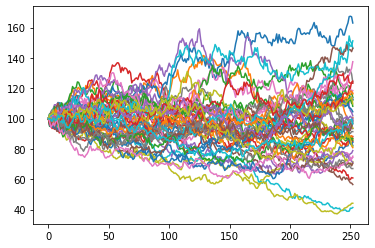

In [ ]:
I = 1000
print(MonteCarlo('call',S,K,r,T,sigma,I))
print(BS_formula('call',S,K,r,T,sigma))

문제 3. Monte Carlo simulation을 이용하여 유러피안 옵션의 Greeks를 구해 보세요